In [106]:
from torch_geometric.utils import to_networkx
import networkx as nx
import torch

def find_all_rings(graph_data):

    nx_graph = to_networkx(graph_data, to_undirected=True)
    cycles = list(nx.simple_cycles(nx_graph))

    return cycles

def have_edge(adj, node1, node2):

    return adj[node1, node2] == 1 or adj[node2, node1] == 1


def get_S(data):
    S=torch.zeros(max_nodes,max_nodes)
    adj=torch.zeros((data.num_nodes, data.num_nodes))
    adj[data.edge_index[0], data.edge_index[1]] = 1
    rings=find_all_rings(data)
    
    if len(rings)==0:
        return torch.eye(max_nodes)
    i=0
    for ring in rings:
        if i>=max_nodes:
            return torch.eye(max_nodes)
        if len(ring)<9:
            for j in ring:
                S[j][i]=1.0
            i+=1
            
    for j in range(data.x.shape[0]):
        if i>=max_nodes:
            return torch.eye(max_nodes)
        if S[j,:].max()==0:
            S[j,i]=1.0
            for k in range(j+1,data.num_nodes):
                if S[k,:].max()==0 and have_edge(adj, j, k):
                    S[k,i]=1.0
            i+=1
            
    return S

def visualize_data(ori,S,remove=False):
    adj=torch.zeros((max_nodes, max_nodes))
    adj[ori.edge_index[0], ori.edge_index[1]] = 1.0
    adj=S.T@adj@S
    for i in reversed(range(adj.shape[0])):
        if adj[i].max()>0:
            break
    i+=1
    adj=adj[:i,:i].numpy()
    for i in range(adj.shape[0]):
        adj[i,i]=0
    
    if remove:
        keep_i=[]
        for i in range(adj.shape[0]):
            if adj[i].max()>0:
                keep_i.append(i)
        adj=adj[keep_i]
        adj=adj[:,keep_i]

    g = nx.from_numpy_array(adj)

    layout = nx.spring_layout(g)
    nx.draw(g,layout)

In [7]:
smiles_list=["Cc1c(C)c2c(F)c(-c3nc4c(C)c5c(ncn5C)c(C)c4n3C)sc2c2scc(F)c12",
             "COC(=O)N1C(F)(F)c2cccc(-c3ccc(-c4ccc5c6ccc(-c7cccs7)cc6n(C)c5c4)s3)c2C1(F)F",
             "C[C@H]1CCC(=O)OC1",
             "CCC1(O)CC=CC1"]
#OPV_S=torch.from_numpy(np.load("./saved_models/DIFF_OPV_S.npy"))

In [8]:
for i in range(len(smiles_list)):
    save_svg("./figure/mol%d.svg"%(i+1),smiles_list[i])

In [5]:
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import MolFromSmiles

# Copied from https://github.com/rdkit/rdkit-tutorials/issues/5
def save_svg(filename,input_smiles):
    canvas_width_pixels = 300
    canvas_height_pixels  = 200
    mol = MolFromSmiles(input_smiles)
    mol = rdMolDraw2D.PrepareMolForDrawing(mol)
    drawer = rdMolDraw2D.MolDraw2DSVG(canvas_width_pixels,canvas_height_pixels)
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    with open(filename, 'w') as f:
        f.write(svg)

In [119]:
from rdkit.Chem import AddHs
from rdkit.Chem.AllChem import EmbedMolecule,MMFFOptimizeMolecule
from rdkit.Chem.rdmolfiles import MolToXYZFile



for i in range(len(smiles_list)):
    cur_mol=AddHs(MolFromSmiles(smiles_list[i]))
    EmbedMolecule(cur_mol)
    MMFFOptimizeMolecule(cur_mol)
    MolToXYZFile(cur_mol,"./DFT/mol%d.xyz"%(i+1))
    
    save_svg("./figure/mol%d.svg"%(i+1),smiles_list[i])


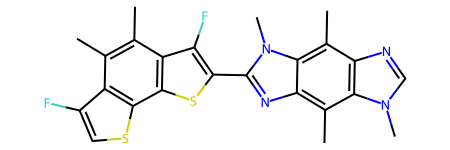

In [114]:

MolFromSmiles(smiles_list[0])

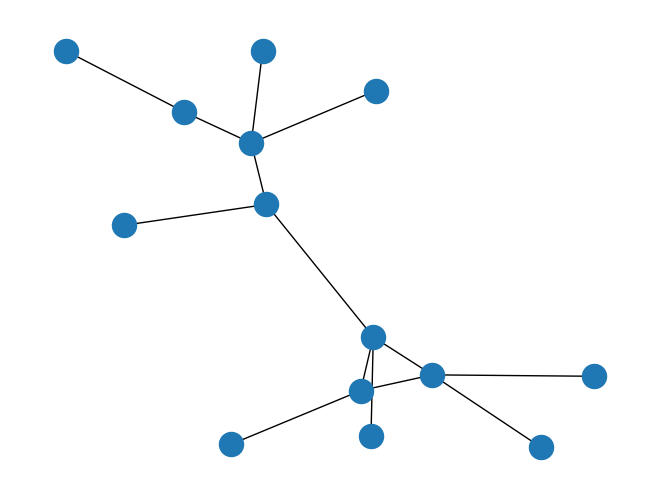

In [115]:
import networkx as nx
from torch_geometric.utils import from_smiles
from torch_geometric.utils import to_networkx

max_nodes=122

g=from_smiles(smiles_list[0])
S=get_S(g)
visualize_data(g,S)

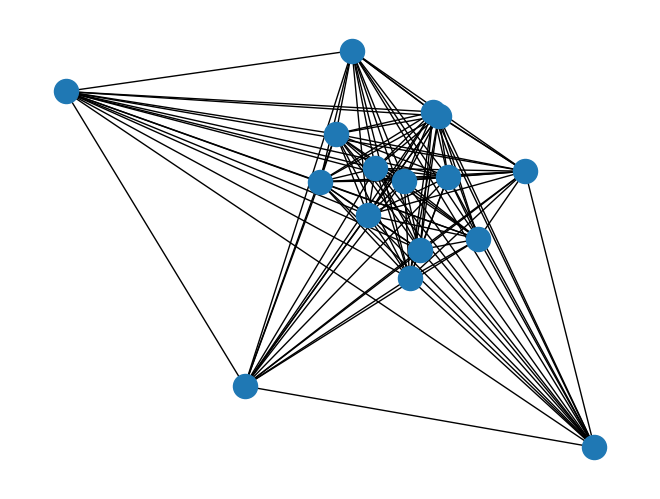

In [110]:
visualize_data(g,OPV_S[0],remove=True)

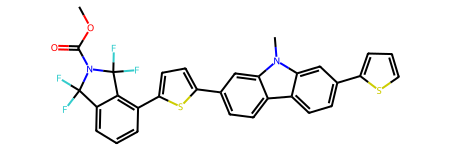

In [111]:
MolFromSmiles(smiles_list[1])

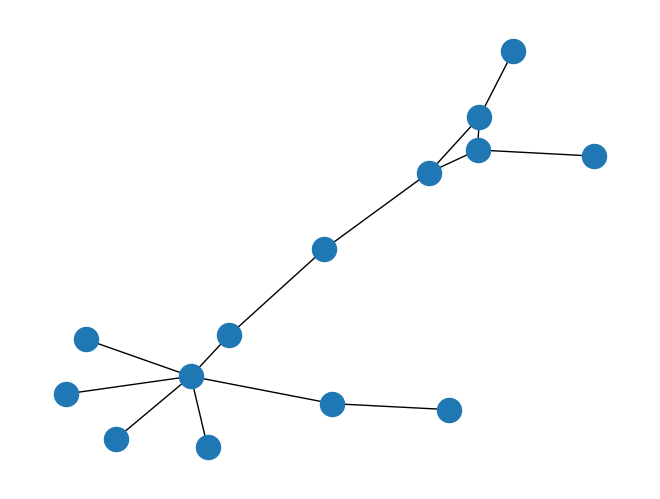

In [112]:
g=from_smiles(smiles_list[1])
S=get_S(g)
visualize_data(g,S)

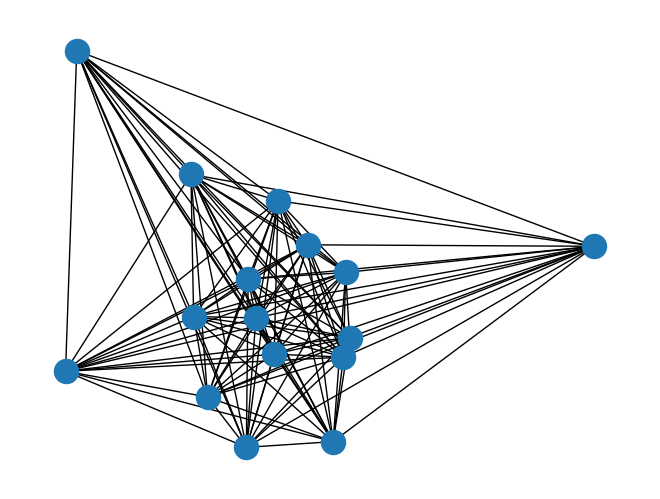

In [113]:
visualize_data(g,OPV_S[1],remove=True)

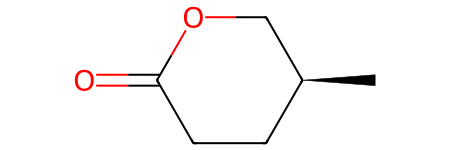

In [70]:
MolFromSmiles(smiles_list[2])

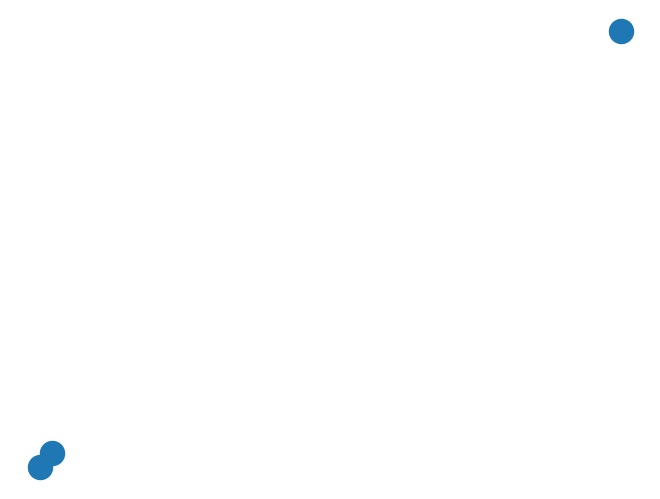

In [71]:
max_nodes=9
g=from_smiles(smiles_list[2])
S=torch.tensor([[2.9548, 0.0000, 7.0829],
         [4.6630, 0.0000, 9.3750],
         [4.0158, 0.0000, 8.3664],
         [3.6069, 0.0000, 6.2083],
         [2.7244, 0.0000, 4.3757],
         [0.2756, 0.0000, 0.3999],
         [3.8084, 0.0000, 5.0550],
         [4.2172, 0.0000, 7.2131],
         [0.0000, 0.0000, 0.0000]])
visualize_data(g,S)

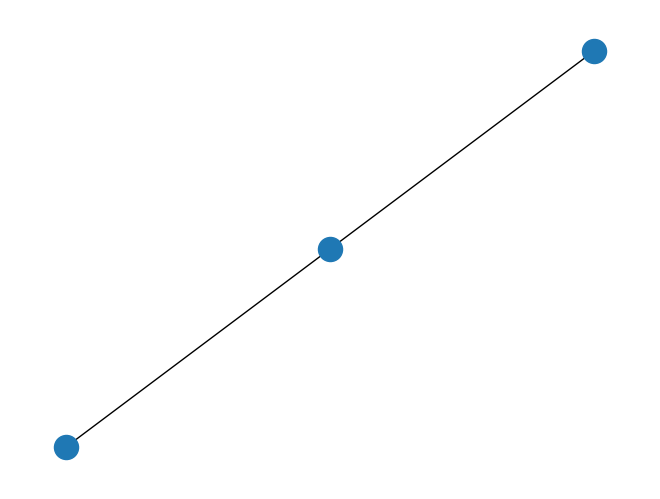

In [72]:
S=get_S(g)
visualize_data(g,S)

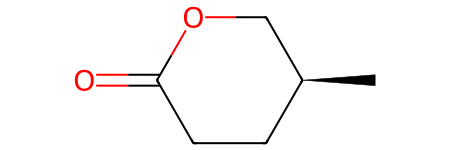

In [73]:
MolFromSmiles("C[C@H]1CCC(=O)OC1")

tensor([[287.6830,   0.0000, 487.8326],
        [  0.0000,   0.0000,   0.0000],
        [487.8325,   0.0000, 833.2994]])


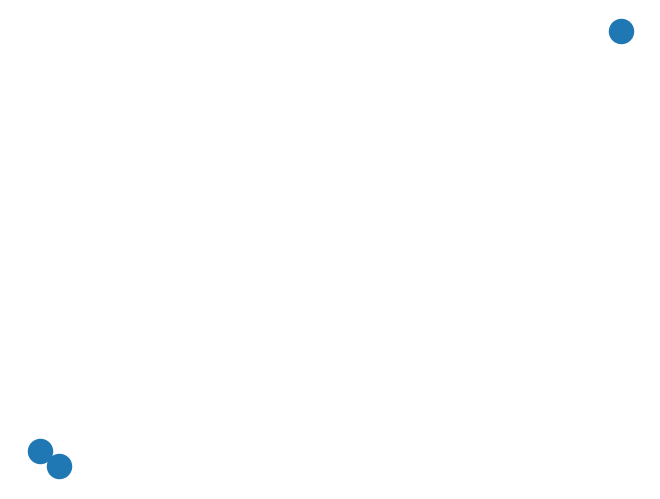

In [61]:
max_nodes=9
g=from_smiles(smiles_list[2])
S=torch.tensor([[2.9893, 0.0000, 7.1162],
         [4.1858, 0.0000, 8.4671],
         [5.2983, 0.0000, 8.3270],
         [2.9852, 0.0000, 3.4018],
         [4.6228, 0.0000, 7.5535],
         [4.3397, 0.0000, 7.4099],
         [4.3397, 0.0000, 7.4099],
         [4.6228, 0.0000, 7.5535],
         [0.0000, 0.0000, 0.0000]])
visualize_data(g,S)

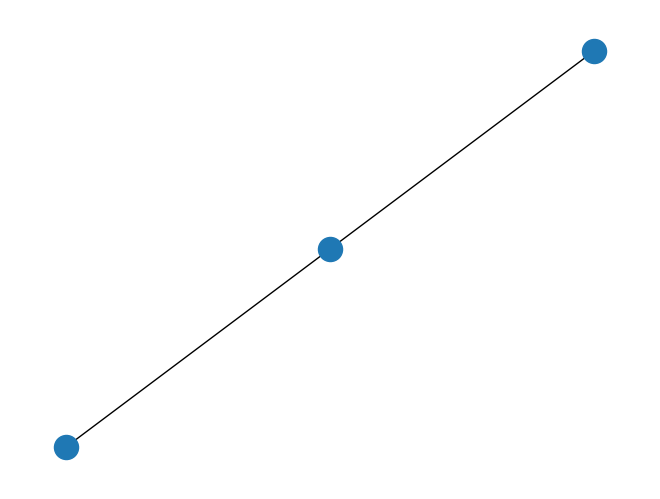

In [74]:
S=get_S(g)
visualize_data(g,S)

In [76]:
test=np.array([1,2,3])
np.save("./saved_models/test.npy", test)
np.load("./saved_models/test.npy")

array([1, 2, 3])

# Other molecules

In [11]:
smiles_list=["C#C[C@H]1C[C@H]2N[C@H]2CO1","O[C@@]12CO[C@]1(C1CC1)C2",
             "Cc1ccc(-c2ccc(-c3ccc(-c4ccc5c(c4)C(C)(C)c4cc(-c6cc7ccc8c(ccc9cc(-c%10ccc%11c(c%10)C(C)(C)c%10cc(-c%12ccc(-c%13ccc(-c%14ccc(C)s%14)s%13)s%12)ccc%10-%11)n(C)c98)c7n6C)ccc4-5)s3)s2)s1",
             "Cc1sc(C)c2c3cc(-c4ccc(-c5cc6c7cc8c(cc7c7cc(-c9ccc(-c%10cc%11c(s%10)c%10sc(-c%12cccs%12)cc%10c%10c(C)sc(C)c%11%10)s9)sc7c6s5)C(=O)N(C)C8=O)s4)sc3c3sccc3c12",
            "Cn1c2ccccc2c2cccc(-c3ccc(-c4cc5c(s4)C(=O)c4cc(-c6ccc(-c7cccc8c9cccc(-c%10cccs%10)c9n(C)c78)s6)sc4C5=O)s3)c21"
]

In [12]:
for i in range(len(smiles_list)):
    save_svg("./figure/mol%d.svg"%(i+5),smiles_list[i])
    